In [1]:
# 📌 Task 1: Decision Tree Model for Predicting Legendary Pokémon

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("pokemon.csv")

In [2]:
# Display basic info
print("Initial Shape:", df.shape)
print(df.head())
print(df.info())

Initial Shape: (697, 16)
   #        Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
0  1   Bulbasaur  Grass  Poison  45      49       49       65       65     45   
1  2     Ivysaur  Grass  Poison  60      62       63       80       80     60   
2  3    Venusaur  Grass  Poison  80      82       83      100      100     80   
3  5  Charmander   Fire  Normal  39      52       43       60       50     65   
4  6  Charmeleon   Fire  Normal  58      64       58       80       65     80   

   Generation  Legendary  height  weight  base_experience  \
0           1      False       7      69               64   
1           1      False      10     130              142   
2           1      False      20    1000              236   
3           1      False       6      85               62   
4           1      False      11     190              142   

                                             sprites  
0  {'normal': 'http://img.pokemondb.net/sprites/b...  
1  {'normal

In [3]:
# Drop irrelevant columns (like 'Name', 'Generation' if not helpful)
df = df.drop(['#', 'Name'], axis=1)

In [4]:
# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
# Define features and target
X = df.drop('Legendary', axis=1)
y = df['Legendary']

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Build and train the model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
# Predict
y_pred = clf.predict(X_test)

In [9]:
# Evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9714285714285714

Confusion Matrix:
 [[133   1]
 [  3   3]]

Classification Report:
               precision    recall  f1-score   support

       False       0.98      0.99      0.99       134
        True       0.75      0.50      0.60         6

    accuracy                           0.97       140
   macro avg       0.86      0.75      0.79       140
weighted avg       0.97      0.97      0.97       140



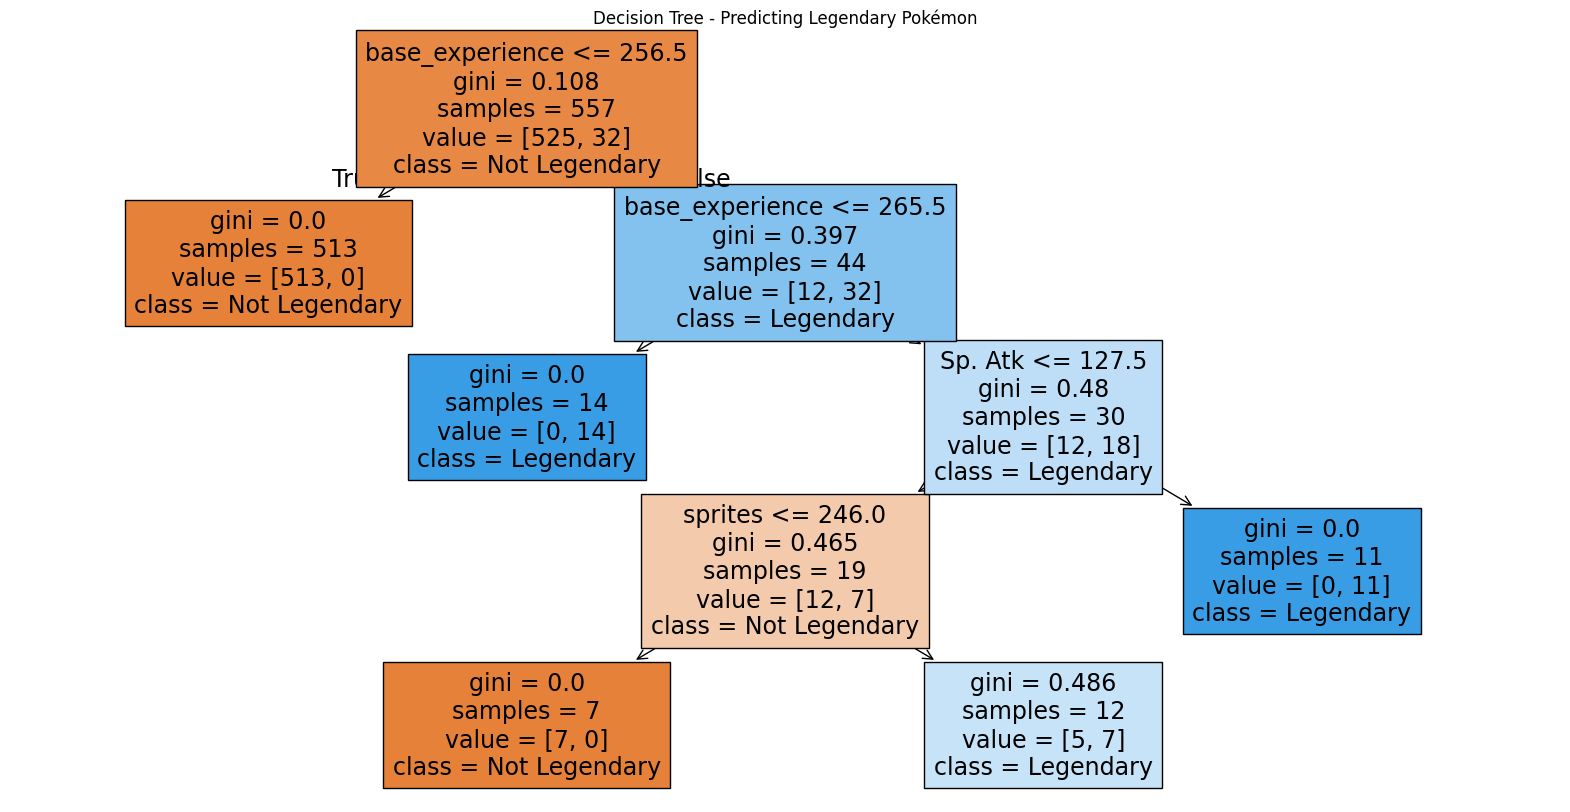

In [10]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Not Legendary', 'Legendary'], filled=True)
plt.title("Decision Tree - Predicting Legendary Pokémon")
plt.show()